In [41]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

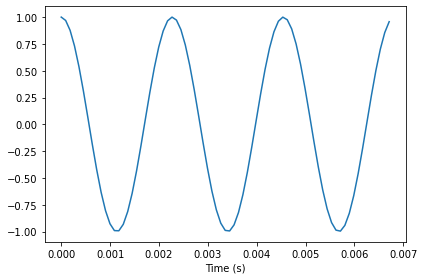

In [42]:
from thinkdsp import CosSignal, SinSignal
# 创建sin，cos波形
cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=880, amp=0.5, offset=0)
from thinkdsp import decorate

cos_sig.plot()
decorate(xlabel='Time (s)')

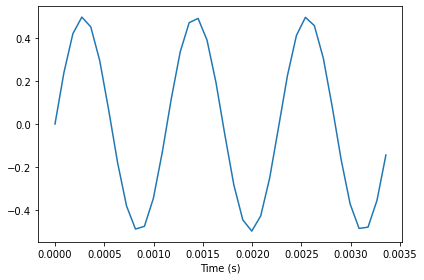

In [43]:
sin_sig.plot()
decorate(xlabel='Time (s)')

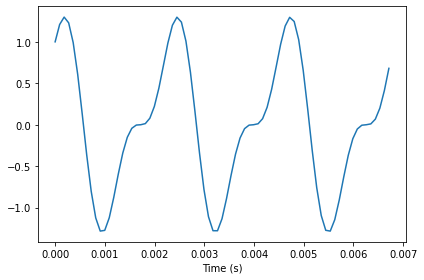

In [44]:
mix = sin_sig + cos_sig
mix.plot()
decorate(xlabel='Time (s)')

In [45]:
#混合音频
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave.make_audio()

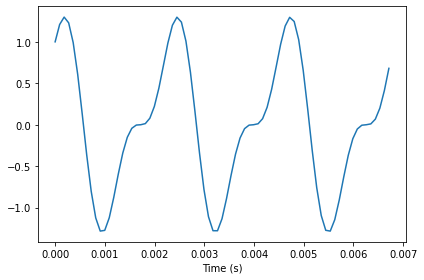

In [46]:
# 分片但是三倍持续时间也只有这一点音频所以不变
period = mix.period
segment = wave.segment(start=0, duration=period*3)
segment.plot()
decorate(xlabel='Time (s)')

In [47]:
# 标准化+保存文件
wave.normalize()
wave.apodize()
wave.write('temp.wav')

Writing temp.wav


In [48]:
# 导入音频
from thinkdsp import play_wave,read_wave

wave = read_wave('happy.wav')
wave.make_audio()

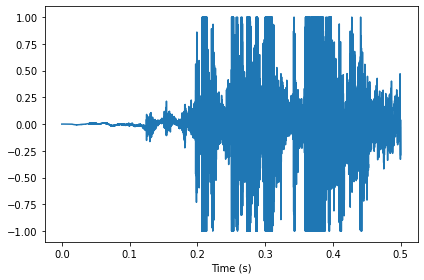

In [49]:
# 截取前0.5s
start = 0.0
duration= 0.5
segment = wave.segment(start,duration)
segment.plot()
decorate(xlabel='Time (s)')

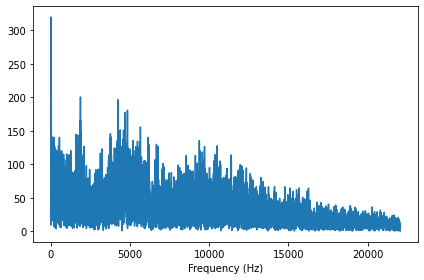

In [50]:
#转频域
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

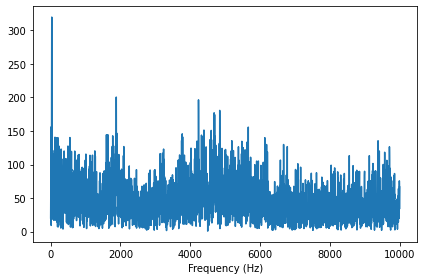

In [51]:
# 最高频率截止
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

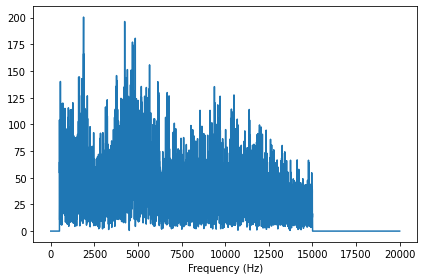

In [52]:
# 中通滤波
spec_temp = spectrum

spec_temp.low_pass(15000)
spec_temp.high_pass(500)
spec_temp.plot(high=20000)
decorate(xlabel='Frequency (Hz)')

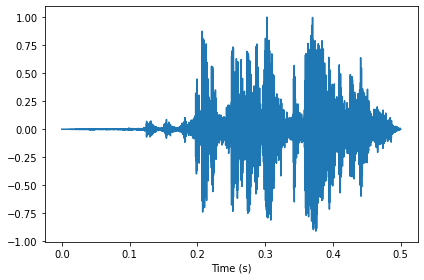

In [53]:
# 频域转时域
filtered = spec_temp.make_wave()
filtered.normalize()
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')

In [54]:
segment.make_audio()

In [55]:
filtered.make_audio()

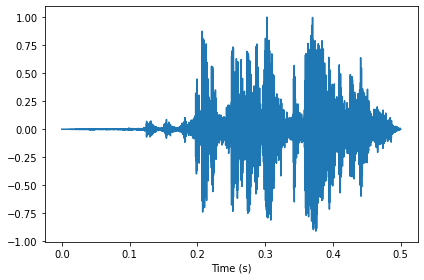

In [56]:
filtered.plot()
decorate(xlabel='Time (s)')

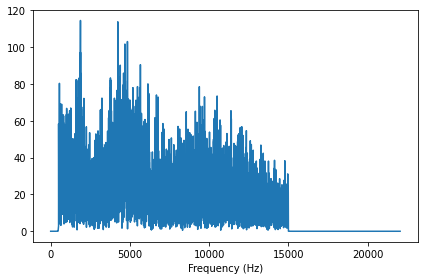

In [57]:
filtered_spectrum = filtered.make_spectrum()
filtered_spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [61]:
# 延长，延迟波形
import stretch
fl2 = stretch.stretch(filtered,1,2)
fl2.make_audio()

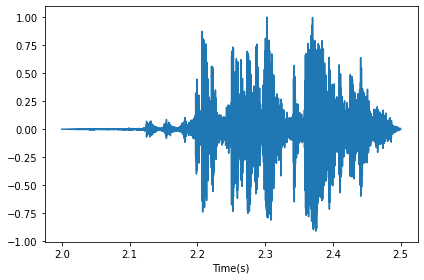

In [62]:
filtered.plot()
decorate(xlabel='Time(s)')

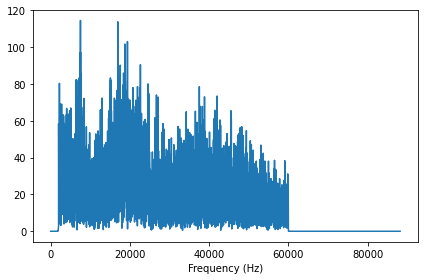

In [63]:
#修改后的频域
filtered_spectrum = filtered.make_spectrum()
filtered_spectrum.plot()
decorate(xlabel='Frequency (Hz)')

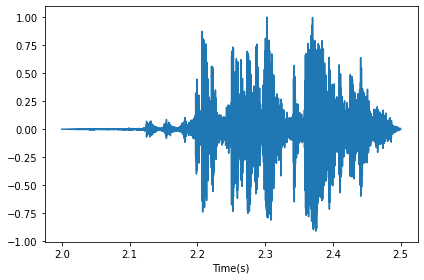

In [64]:
fl2.plot()
decorate(xlabel='Time(s)')

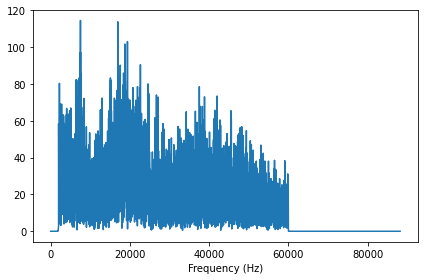

In [65]:
fl2_spectrum = fl2.make_spectrum()
fl2_spectrum.plot()
decorate(xlabel='Frequency (Hz)')